In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor


# load the DataFrame form returns.ipynb
column_names = ["Date", "Close", "High", "Low", "Open", "Volume"]
df = pd.read_csv("aapl_data.csv", skiprows=3, names=column_names, index_col="Date", parse_dates=True)
df.head()




,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.538498,72.598876,71.292289,71.545875,135480400
2020-01-03,71.833267,72.594032,71.608662,71.765644,146322800
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200
2020-01-07,72.065163,72.671356,71.845385,72.415353,108872000
2020-01-08,73.224426,73.526318,71.768101,71.768101,132079200


In [2]:
# calculate moving averages
df['SMA50'] = df['Close'].rolling(window=50).mean()
df['SMA200'] = df['Close'].rolling(window=200).mean()
df.head()

,Close,High,Low,Open,Volume,SMA50,SMA200
Date,,,,,,,
2020-01-02,72.538498,72.598876,71.292289,71.545875,135480400,NaN,NaN
2020-01-03,71.833267,72.594032,71.608662,71.765644,146322800,NaN,NaN
2020-01-06,72.405678,72.444321,70.703012,70.954188,118387200,NaN,NaN
2020-01-07,72.065163,72.671356,71.845385,72.415353,108872000,NaN,NaN
2020-01-08,73.224426,73.526318,71.768101,71.768101,132079200,NaN,NaN


In [3]:
# Drop rows with NaN in SMA columns
df_clean = df.dropna(subset=['SMA50', 'SMA200'])
df_clean.head()

,Close,High,Low,Open,Volume,SMA50,SMA200
Date,,,,,,,
2020-10-15,117.416771,117.893401,114.926616,115.481064,112559200,113.729093,85.965762
2020-10-16,115.772865,118.233847,115.568595,117.971210,115393800,113.832639,86.181933
2020-10-19,112.815819,117.134681,112.504549,116.687232,120639300,113.927333,86.386846
2020-10-20,114.304054,115.733950,112.475340,113.029789,124423700,114.020373,86.596338
2020-10-21,113.681526,115.471323,113.272979,113.486978,89946000,114.166183,86.804420


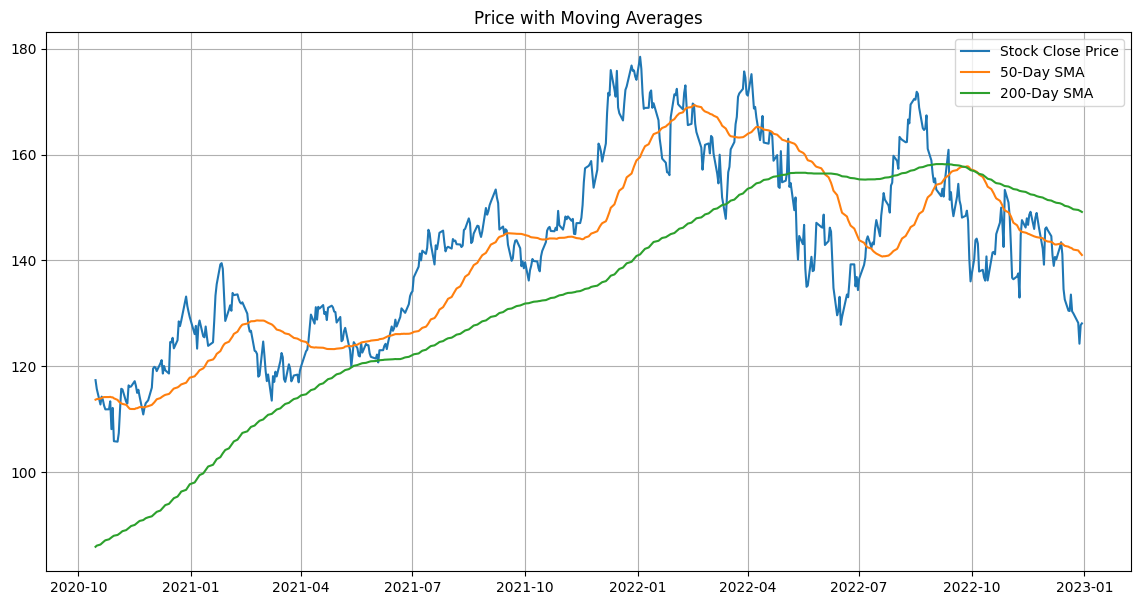

In [4]:
# Plot the values
plt.figure(figsize=(14, 7))
plt.plot(df_clean['Close'], label='Stock Close Price')
plt.plot(df_clean['SMA50'], label='50-Day SMA')
plt.plot(df_clean['SMA200'], label='200-Day SMA')
plt.title("Price with Moving Averages")
plt.legend()
plt.grid(True)
plt.show()

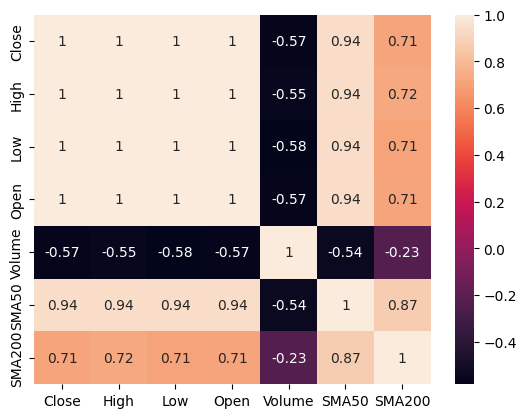

In [5]:
# Correlation matrix
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [6]:
fig = px.line(df, x=df.index, y='Close', title='Historical Closing Prices')
fig.show()

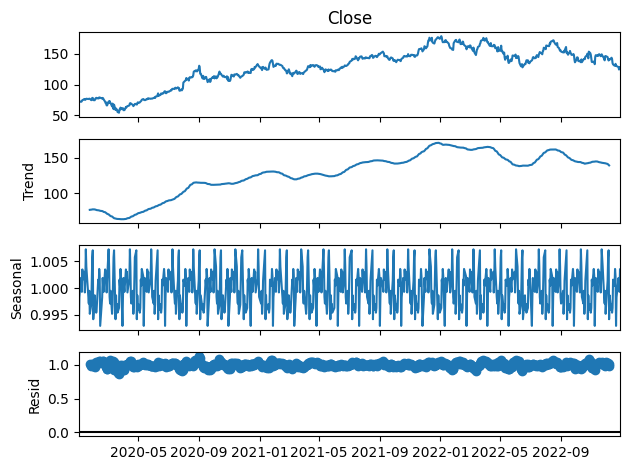

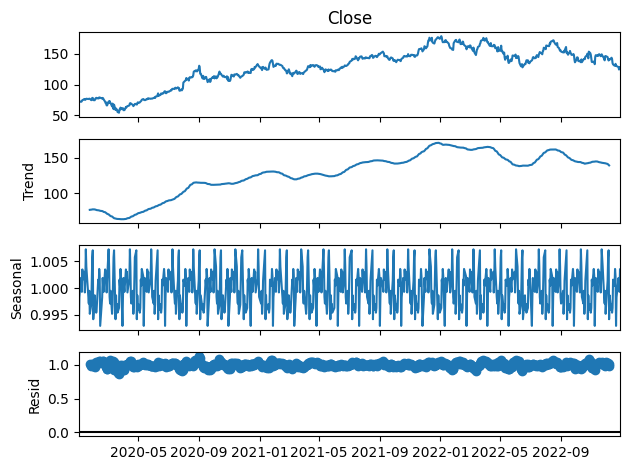

In [7]:
# Perform a seasonal decomposition of the data
result = seasonal_decompose(df['Close'], model='multiplicative', period=30)
result.plot()

In [8]:
# Fit an ARIMA(5,1,0) model
model = ARIMA(df['Close'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\jmlud\Desktop\forex\code\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\jmlud\Desktop\forex\code\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\jmlud\Desktop\forex\code\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  756
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1826.877
Date:                Mon, 13 Oct 2025   AIC                           3665.755
Time:                        16:14:20   BIC                           3693.515
Sample:                             0   HQIC                          3676.448
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0631      0.032     -1.988      0.047      -0.125      -0.001
ar.L2         -0.0279      0.032     -0.873      0.383      -0.090       0.035
ar.L3         -0.0320      0.036     -0.900      0.3

In [9]:
# Prepare the data
x = df.drop('Close', axis=1)
y = df['Close']

In [10]:
# create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# use the model to make predictions
predictions = model.predict(x)

In [ ]:
# Autoregressive Integrated Moving Average (ARIMA) and Vector Autoregression (VAR) models for time series forecasting.